<a href="https://colab.research.google.com/github/elle-ctrl/blog/blob/main/Thompson_Sampling_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The simplest way

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Generate random data for selecting 5 ads designs 200 with click or non-click action.
# 0 denotes a failure, and 1 a success.
data ={}
n_trials = 1000
ads_list = ['M0','M1','M2','M3','M4']
for i in ads_list:
  data[i] = [random.randint(0,1) for x in range(n_trials)]
data = pd.DataFrame(data)  

In [ ]:
ads = 5
ads_selected = [] #initilize the list to store selected machinesM] #initilize the list to store selected machines
rewards = [0] * ads #store the rewards or 1’s received by each chosen machine
penalties = [0] * ads #store the penalty or 0’s received by each chosen machine
total_reward = 0 #total number of rewards obtained using the Thompson Sampling algorithm

for n in range(0, n_trials):
  chosen_ads= 0 #start with machine number 0
  beta_max = 0 #initilize max value

  for i in range(0, ads):
    beta_chosen = random.betavariate(rewards[i] + 1, penalties[i] + 1) #return a random value (between 0 and 1) from a beta distribution of alpha, beta.
    if beta_chosen > beta_max:
      beta_max = beta_chosen
      chosen_ads = i #select the machine that has highest probability of reward
  
  ads_selected.append(chosen_ads) #add the chosen machine to the list of selected machines
  reward = data.to_numpy()[n, chosen_ads] #locate the actual reward from the random data generated in the first place

  if reward == 1:
    rewards[chosen_ads] = rewards[chosen_ads] + 1 #update total rewards if the selected machine resulted in reward
  else:
    penalties[chosen_ads] = penalties[chosen_ads] + 1

  total_reward = total_reward + reward

In [ ]:
print(f'Rewards By Ads: {rewards}')

Rewards By Ads: [26, 46, 90, 113, 215]


In [ ]:
print(f'Total Rewards: {total_reward}')

Total Rewards: 490


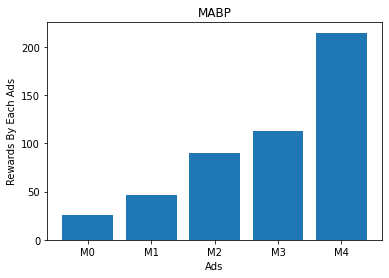

In [ ]:
plt.bar(machine_list,rewards)
plt.title('MABP')
plt.xlabel('Ads')
plt.ylabel('Rewards By Each Ads')
plt.show()

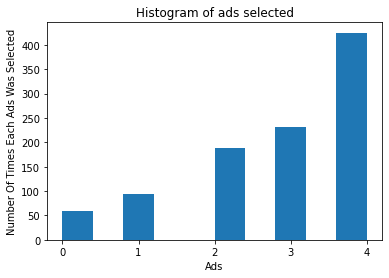

In [ ]:
# Note that Ad4 - the one with highest CTR was selected most often.
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.xticks(range(0, 5))
plt.ylabel('Number Of Times Each Ads Was Selected')
plt.show()

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

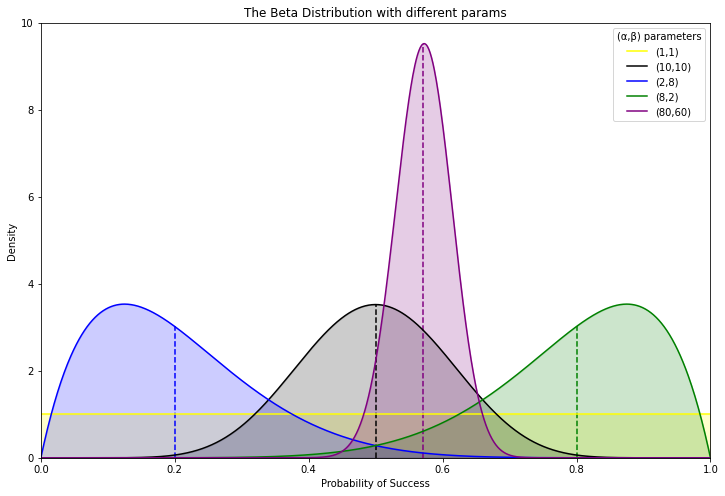

In [ ]:
# Visualizing different Beta distributions
beta = stats.beta

params = [(1,1),(10,10),(2,8),(8,2),(80,60)] # a set of paramaters for different Beta distribution
x = np.linspace(0.0, 1.0, 1_000)

plt.figure(figsize=(12,8))

colors = ['yellow','black','blue','green','purple']
c_index = 0

for α, β in params:
    y = beta.pdf(x, α, β)
    c = colors[c_index]
    lines = plt.plot(x,y,label = f"({α},{β})", color = c)
    plt.fill_between(x, 0, y, alpha = 0.2, color = c) #alpha adjusts transparent level
    
    if α > 1:
        mean = α/(α+β)
        plt.vlines(mean, 0, beta.pdf(mean, α, β), colors = c, linestyles = "--") # plot the mean of each distribution    
    
    plt.autoscale(tight=True)
    c_index += 1
    
plt.title('The Beta Distribution with different params')
plt.xlabel('Probability of Success')
plt.ylabel('Density')

plt.ylim(0,10)
plt.legend(loc = 'upper right', title="(α,β) parameters")
plt.show()

References:

https://analyticsindiamag.com/thompson-sampling-explained-with-python-code/
https://github.com/WhatIThinkAbout/BabyRobot/blob/master/Multi_Armed_Bandits/Part%205%20-%20Thompson%20Sampling.ipynb
